In [1]:
%matplotlib inline
import Euclid
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from astropy.table import Table
from astropy import units as u
from astropy.units import photometric

In [2]:
plt.rcParams['figure.figsize'] = (20, 10)

## Setup environment

In [3]:
%elogin

In [4]:
%erun Phosphoros

In [5]:
from PhzCLI.PlotSpecZComparison import SpeczPhotozPlot, displayHistogram, compute_stats, boxPlot

## Read the join catalog PHZ+MER+TU

In [7]:
t = Table.read('/home/aalvarez/Work/Data/SC7/Pipelines/PS_DEV_PHZProduction_20200310-VALIDATION-nmorisse-PLAN-0001-2020-04-24-21-48-02-12/RUN_with_LSST_TU.fits')

In [8]:
len(t)

59417

## Filter out objects with SNR <= 10

In [9]:
snr = t['FLUX_VIS_APER'] / t['FLUXERR_VIS_APER'] > 10

/home/aalvarez/miniconda3/envs/phz/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [10]:
t = t[snr]

In [11]:
len(t)

18950

## Compute Magnitude AB

In [12]:
t['MAG_VIS_AB'] = t['FLUX_VIS_APER'].to(u.mag(photometric.AB))

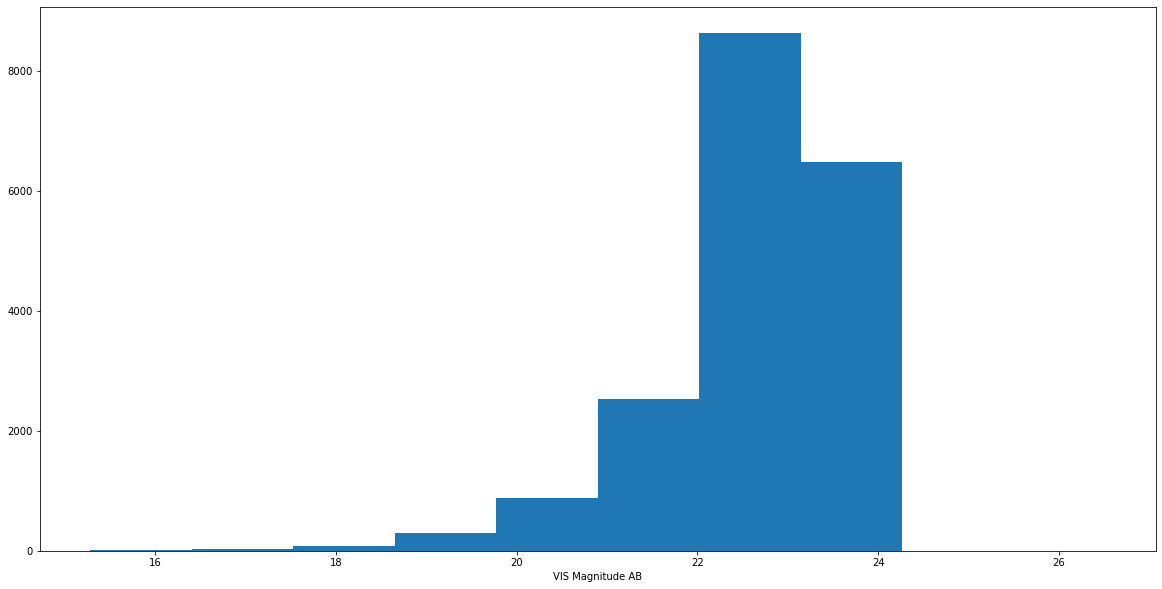

In [13]:
plt.figure()
plt.hist(t['MAG_VIS_AB'])
plt.xlabel('VIS Magnitude AB')
plt.show()

## Apply cut

In [14]:
mag_vis = np.logical_and(t['MAG_VIS_AB'] > 17, t['MAG_VIS_AB'] < 24)

In [15]:
t = t[mag_vis]
len(t)

18924

## Compute statistics

In [16]:
data, mean, median, sigma, mad, outliersPercent,sigmaNoOutliers, meanNoOutliers = compute_stats(t['Z_OBS'], t['REDSHIFT_MEDIAN'])

/home/aalvarez/miniconda3/envs/phz/lib/python3.7/site-packages/numpy/core/fromnumeric.py:746: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


--> Mean                :  -0.04222207884787505
--> Median              :  -0.028020231053233147
--> Sigma               :  0.2269661774046007
--> Mad                 :  0.06783290207386017
--> Outliers            :  26.62756288311139 %
--> Sigma (no outliers) :  0.039371885


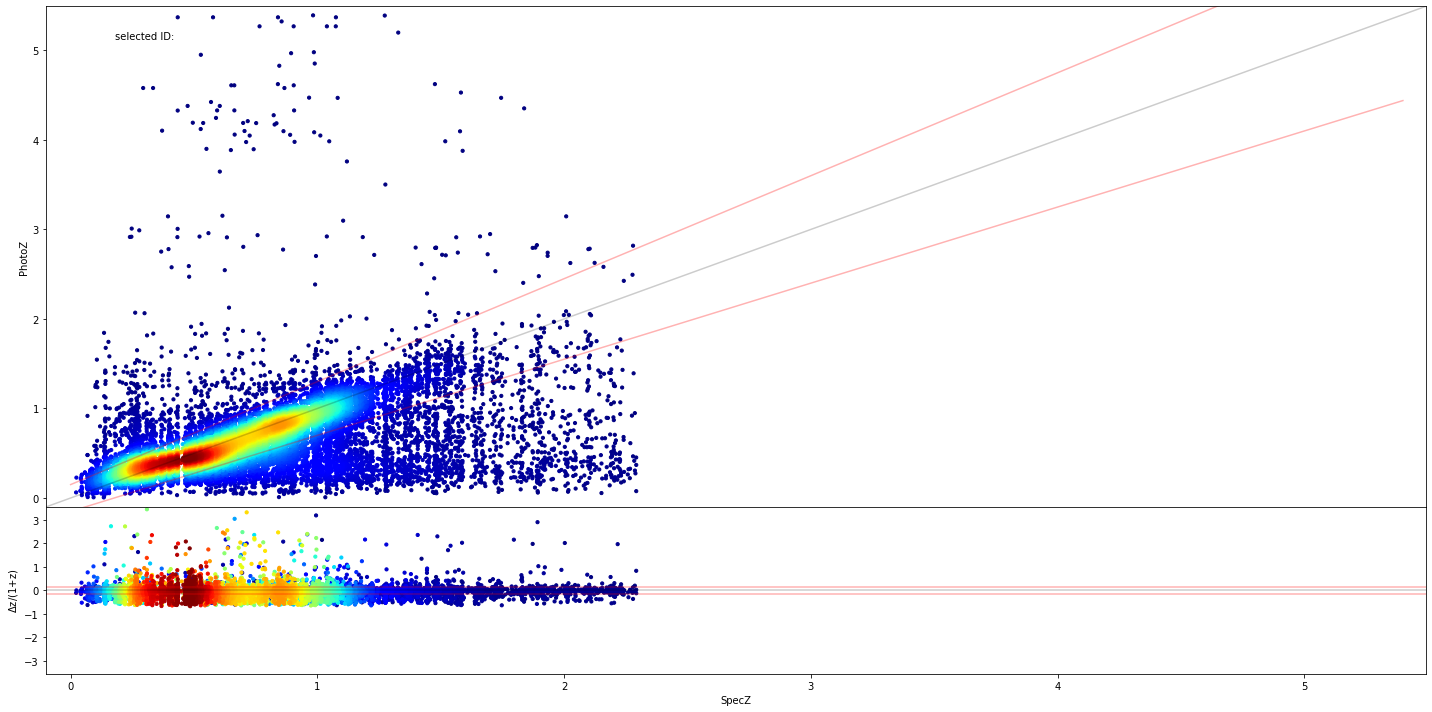

In [17]:
SpeczPhotozPlot(t['OBJECT_ID'], t['Z_OBS'], t['REDSHIFT_MEDIAN'], data)

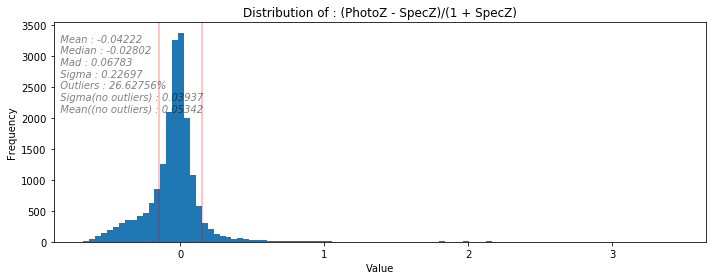

In [18]:
_ = displayHistogram(data, mean, median, mad, sigma, outliersPercent, sigmaNoOutliers, meanNoOutliers)

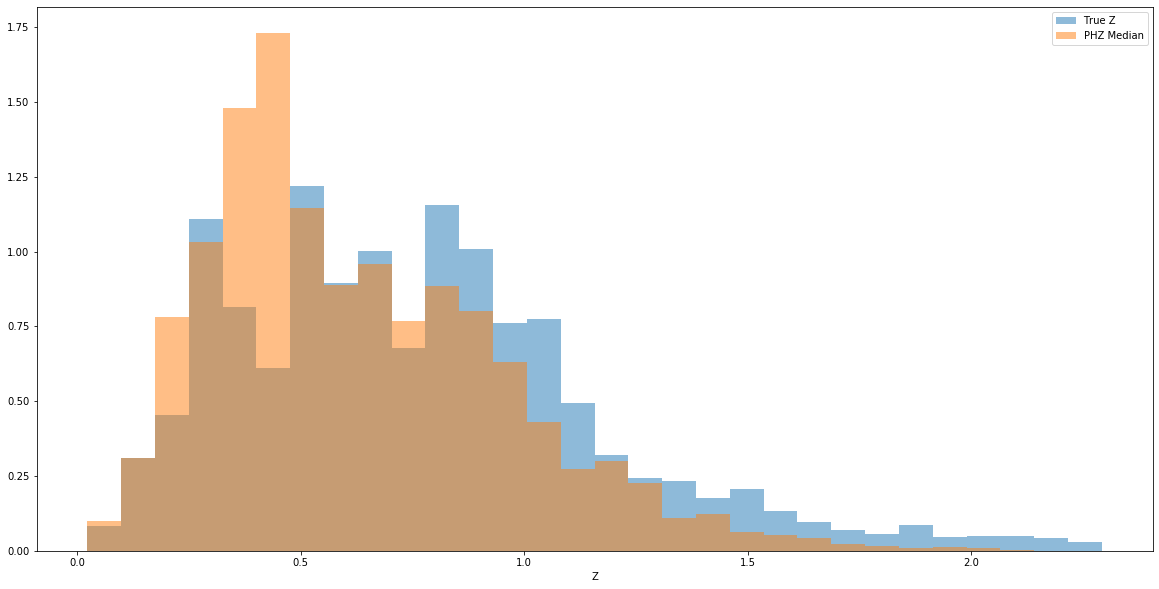

In [19]:
plt.figure()
bins = plt.hist(t['Z_OBS'], bins=30, alpha=0.5, density=True, label='True Z')
plt.hist(t['REDSHIFT_MEDIAN'], bins=bins[1], alpha=0.5, density=True, label='PHZ Median')
plt.xlabel('Z')
plt.legend()
plt.show()

## Box plot

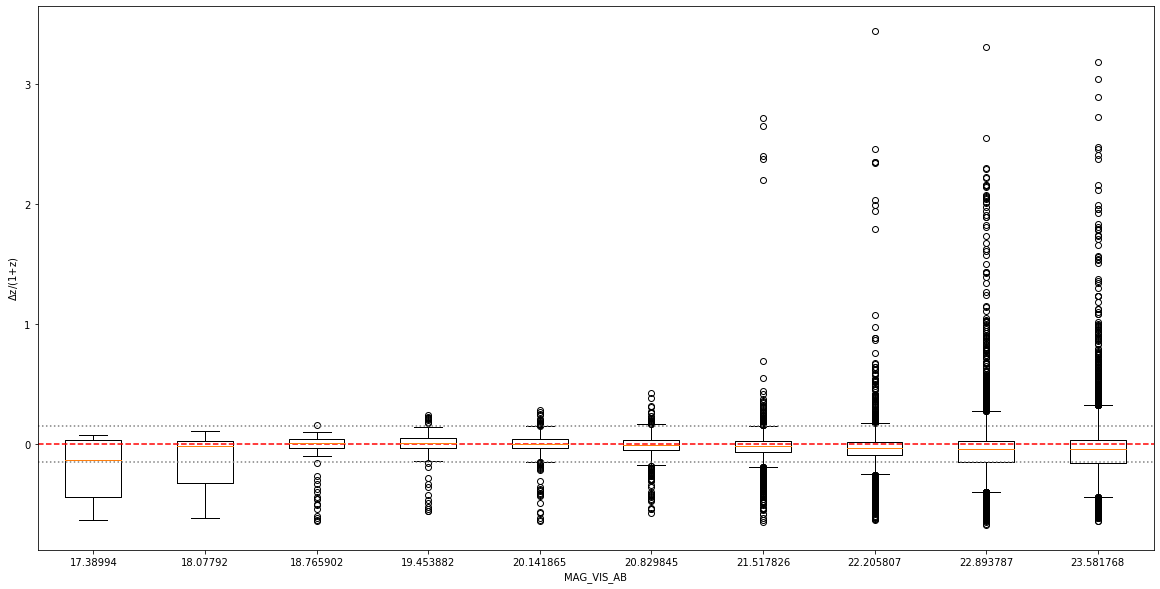

In [20]:
_ = boxPlot(t['MAG_VIS_AB'], data)

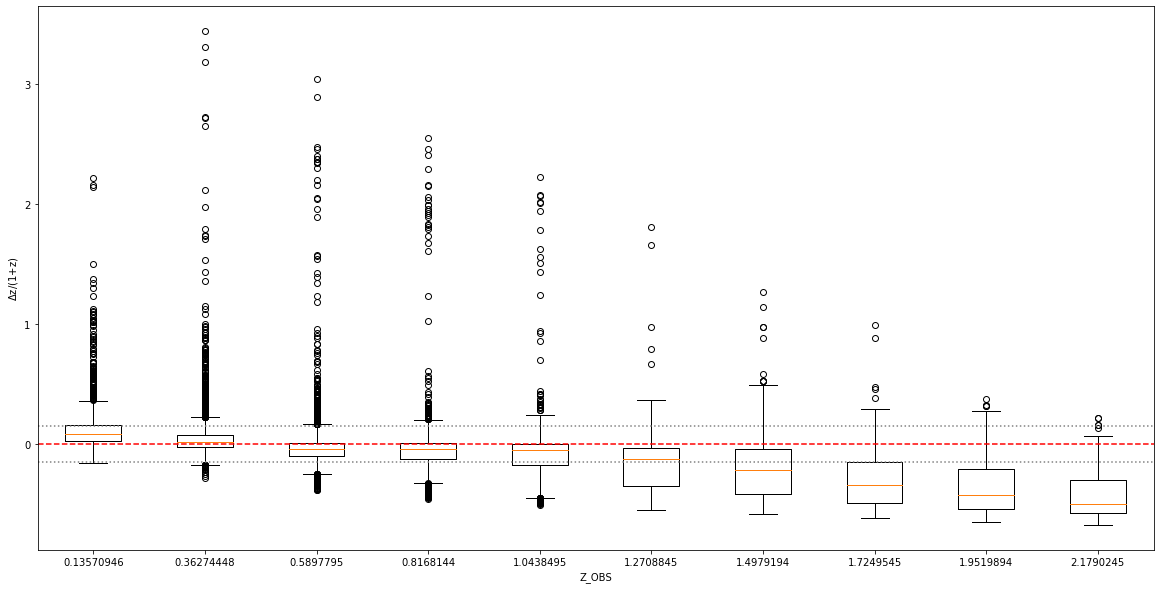

In [21]:
_ = boxPlot(t['Z_OBS'], data)

# Likelihood could not be used

In [23]:
target_catalog_filters = [
    #('FLUX_U_EXT_LSST_APER', 'FLUXERR_U_EXT_LSST_APER'),
    ('FLUX_G_EXT_LSST_APER', 'FLUXERR_G_EXT_LSST_APER'),
    ('FLUX_R_EXT_LSST_APER', 'FLUXERR_R_EXT_LSST_APER'),
    ('FLUX_I_EXT_LSST_APER', 'FLUXERR_I_EXT_LSST_APER'),
    ('FLUX_Z_EXT_LSST_APER', 'FLUXERR_Z_EXT_LSST_APER'),
    ('FLUX_VIS_APER', 'FLUXERR_VIS_APER'),
    ('FLUX_Y_APER', 'FLUXERR_Y_APER'),
    ('FLUX_J_APER', 'FLUXERR_J_APER'),
    ('FLUX_H_APER', 'FLUXERR_H_APER')
]
n_filters = len(target_catalog_filters)

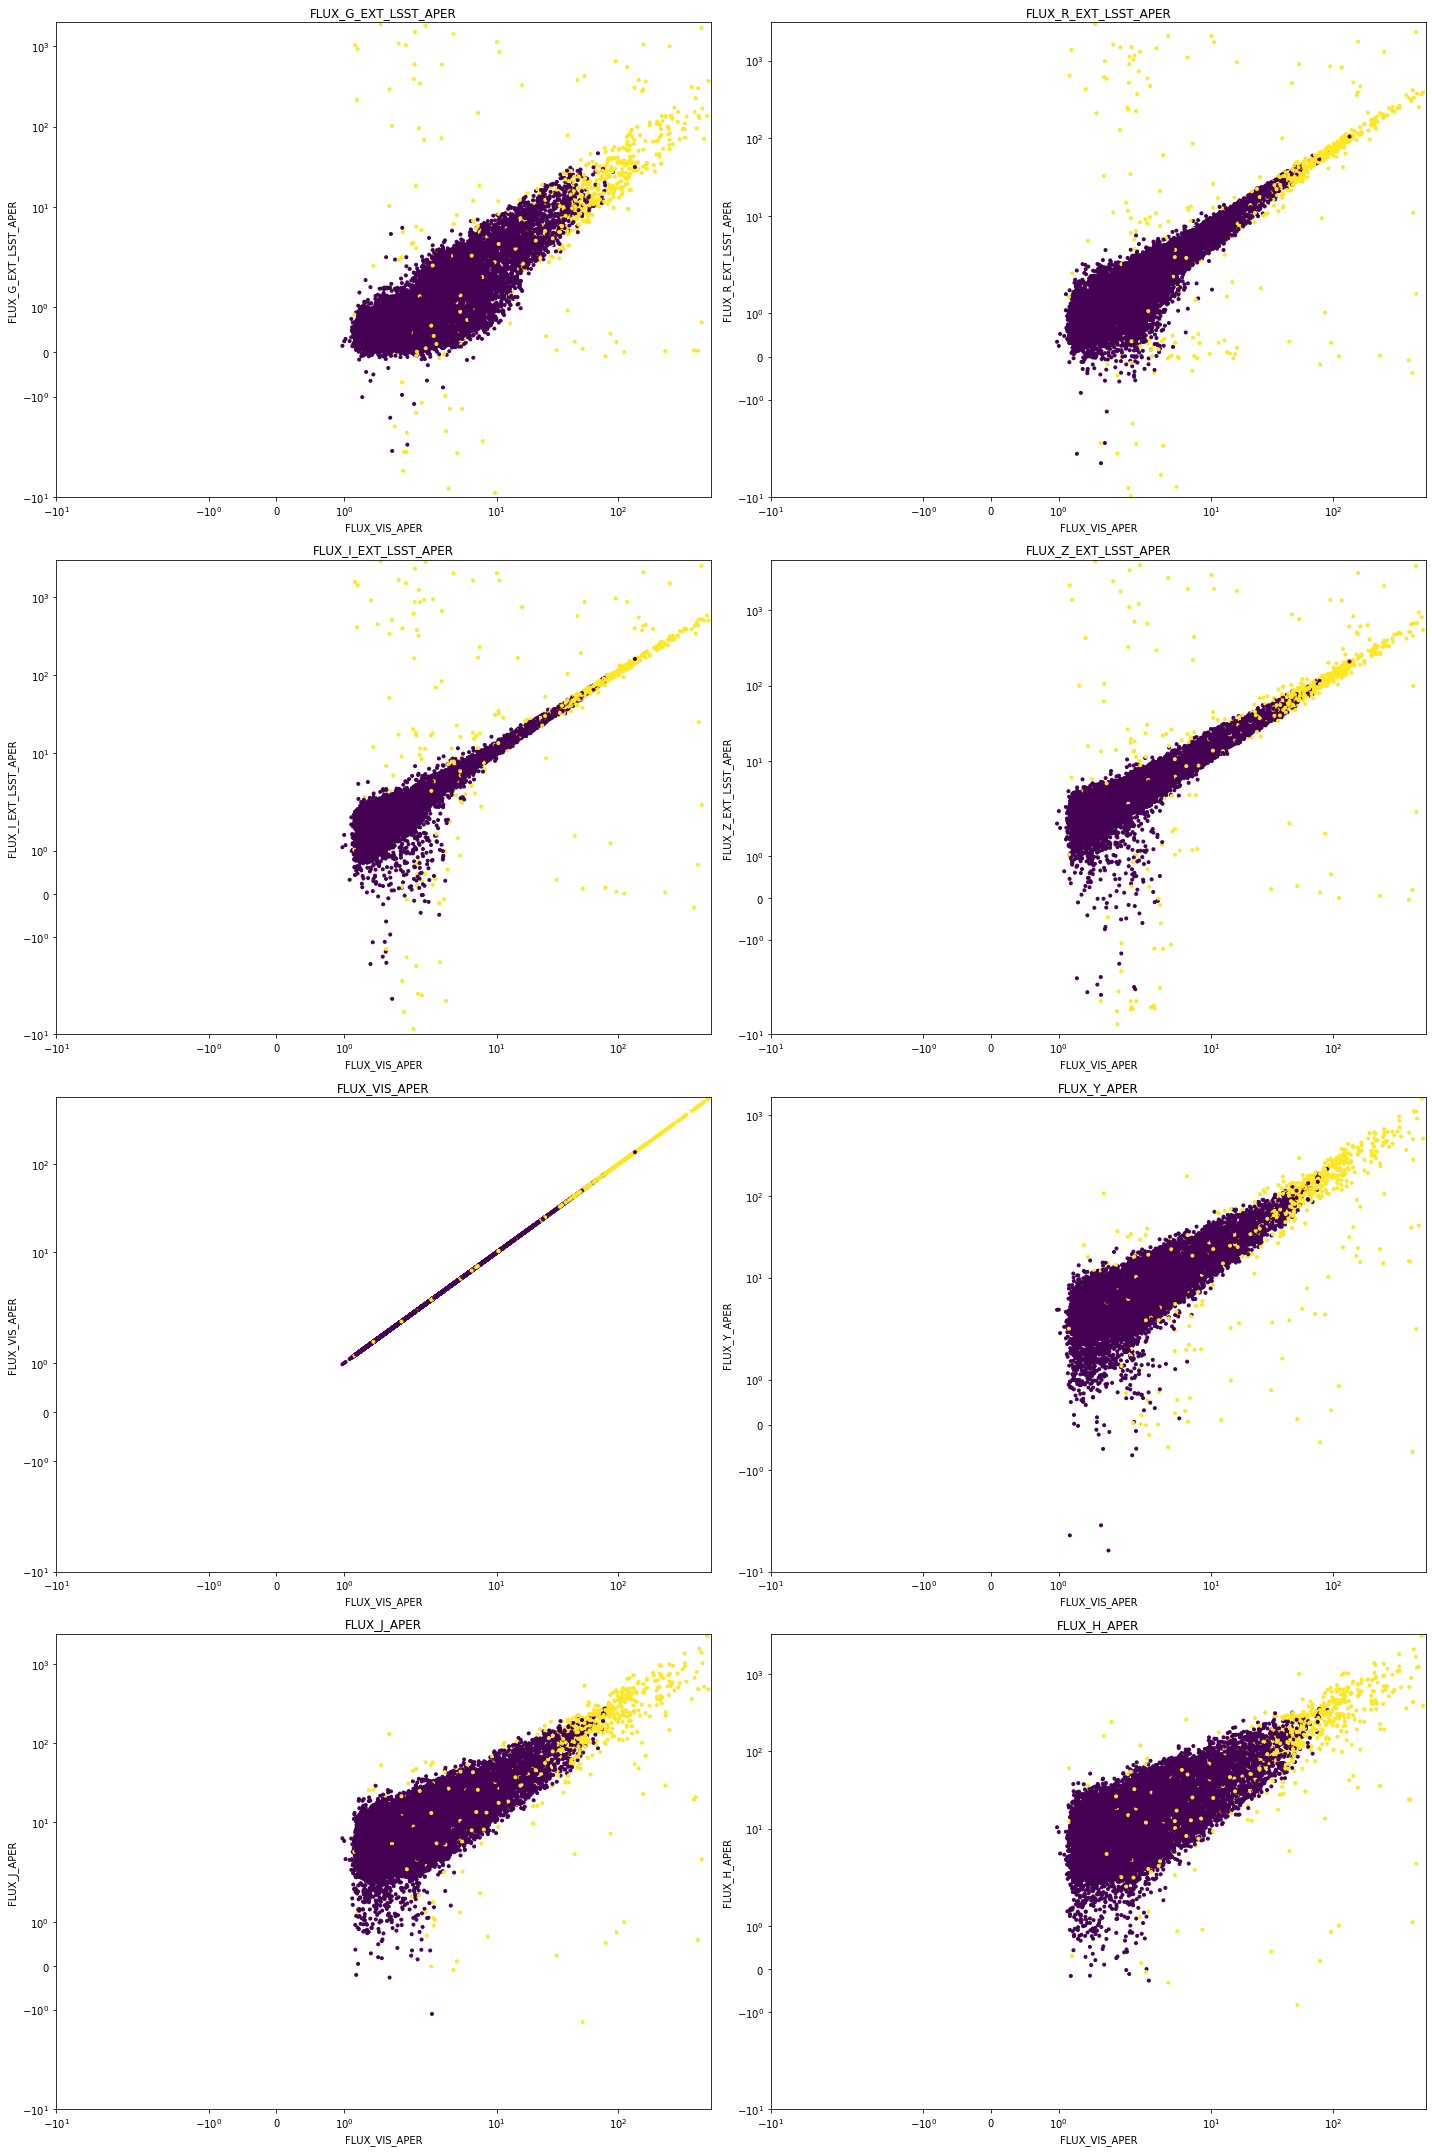

In [26]:
ncols = 2
nrows = n_filters // ncols + (n_filters % ncols > 0)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 30))
axes = axes.ravel()

for i, (flux, error) in enumerate(target_catalog_filters):
    axes[i].scatter(t['FLUX_VIS_APER'], t[flux], marker='.', c=t['AlternativeWeightFlag'])
    axes[i].set_title(f'{flux}')
    axes[i].set_xlabel('FLUX_VIS_APER')
    axes[i].set_ylabel(flux)
    axes[i].set_xlim(-10)
    axes[i].set_ylim(-10)
    axes[i].set_xscale('symlog')
    axes[i].set_yscale('symlog')
    
plt.tight_layout()